In [22]:
import pandas as pd

In [23]:
import numpy as np

In [24]:
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

#### Importando os dados que serão utilizados

In [26]:
df = pd.read_csv("car_data.csv")

# mostrando as primeiras linhas do arquivo.
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


In [27]:
# o nosso dataset possui 301 registros de carros usados
print(df.shape)

(301, 9)


#### Alterando string para número, fazendo uma espécie de classificação

In [28]:
df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### Plotando o gráfico de PREÇO X ANO

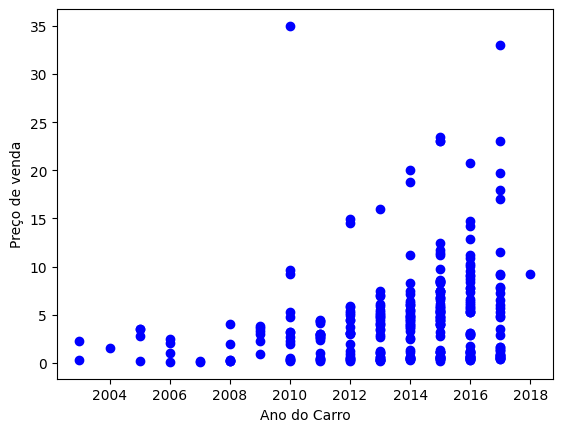

In [29]:
plt.scatter(df['ano'], df['preco_venda'],  color='blue')
plt.xlabel("Ano do Carro")
plt.ylabel("Preço de venda")
plt.show()

#### Plotando gráfico de KM's RODADOS X ANO

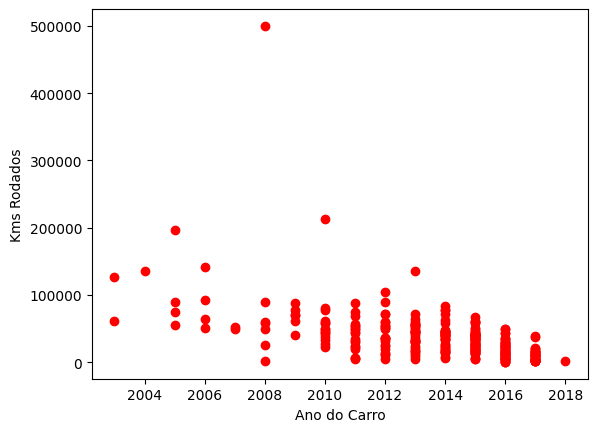

In [30]:
plt.scatter(df['ano'], df['kms_rodados'],  color='red')
plt.xlabel("Ano do Carro")
plt.ylabel("Kms Rodados")
plt.show()

#### Relacionando as variáveis

In [31]:
# escolhendo as variáveis independentes
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]

In [32]:
# escolhendo as variáveis dependentes
new_y = df[['preco_venda']]

<p>Usamos o conjunto de dados de teste como uma entrada para o modelo depois que o modelo foi construído para “testar” se o modelo funciona conforme necessário.</p>

In [33]:
# separando os dados para treino e para teste
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2)

In [34]:
# Vendo o número de registros que serão usados para o treino e teste
print('Treino')
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)

print('\nTeste')
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

Treino
x_train:  (240, 4)
y_train:  (240, 1)

Teste
x_test:  (61, 4)
y_test:  (61, 1)


In [35]:
from sklearn.linear_model import LinearRegression

# define um modelo de regressão
model = LinearRegression()

# treina o modelo com os dados de treino
model.fit(x_train, y_train)

LinearRegression()

In [36]:
# y_pred contém a previsão dos preços do nosso modelo
y_pred = model.predict(x_test)

In [37]:
print(y_pred.shape)
print(y_test.shape)

(61, 1)
(61, 1)


#### Plotando gráfico de preço PREVISTO X REAL

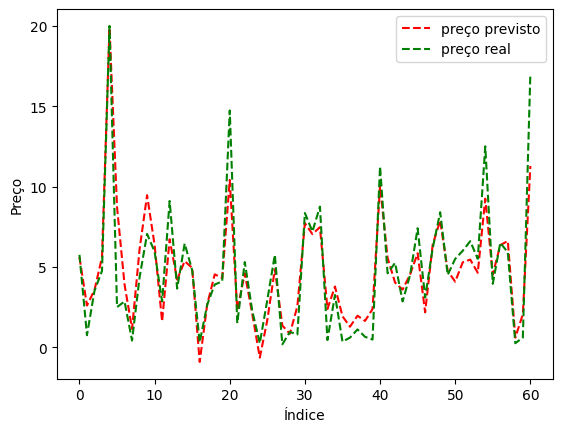

In [38]:
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

In [39]:
from sklearn.metrics import r2_score

<p>Para saber o quanto o nosso modelo está explicando os dados, ou o quanto o modelo pode prever corretamente, iremos utilizar a medida r2, que é o coeficiente de determinação. Para isso iremos utilizar os dados da resposta na etapa de teste e os dados de resposta previstos.</p>

In [40]:
print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.8347365172703212


In [42]:
# o resultado é pior, pois pega uma base de dados menor